In [1]:
import numpy as np

def opt_problem(t):
    return t
    

from scipy.optimize import differential_evolution
import numpy as np
def ackley(x):
    return 1+np.log((1+0.5*x)*(1-0.0075*x*x)*(1+0.005*x*x))
bounds = [(0, 1000)]
result = differential_evolution(ackley, bounds)
result.x, result.fun


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log


(array([248.70130668]), nan)

In [171]:
import matplotlib.pyplot as plt


C:\Users\User\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


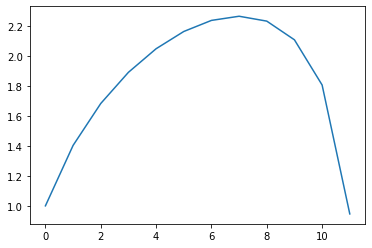

In [90]:
x_  = np.linspace(0, 1000, 1000)
plt.plot(ackley(x_))

In [33]:
def alpha(a_hat, I_p_hat):
    return np.exp(a_hat)*I_p_hat*0.5 if 0<a_hat<=1 else 0 if a_hat>1 else None

def gamma(a_hat, I_d_hat):
    return np.exp(I_d_hat)*a_hat*0.05 if 0<a_hat<=1 else 0 if a_hat>1 else None
    
def betta(a_hat, I_d_hat, I_t_hat):
    return (a_hat+gamma(a_hat,I_d_hat))*I_t_hat*1e-5 if 0<a_hat<=1 else 0 if a_hat>1 else None
def I_p(t, a_hat, I_p_hat):
    return I_p_hat*(1+alpha(a_hat,I_p_hat)*t) if I_p_hat*(1+alpha(a_hat,I_p_hat)*t)<1 else 1 
    
def I_d(t, a_hat, I_d_hat):
    return I_d_hat*(1+gamma(a_hat,I_d_hat)*t) if I_d_hat*(1+gamma(a_hat,I_d_hat)*t)<1 else 1 

def I_t(t, a_hat, I_d_hat, I_t_hat):
    return I_t_hat*(1-betta(a_hat, I_d_hat, I_t_hat)*t*t) if betta(a_hat, I_d_hat, I_t_hat)*t*t<1 else 0

def I(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_p(t, a_hat, I_p_hat)*I_d(t, a_hat, I_d_hat)*I_t(t, a_hat, I_d_hat, I_t_hat)

In [191]:
lspace = np.linspace(0,1000,100000)

In [192]:
a_hat = 0.2
I_p_hat = 0.7
I_d_hat = 0.8
I_t_hat = 0.8

In [193]:
def inequlity(f,t,bound1,bound2):
    return (f(t,a_hat,I_p_hat,I_d_hat,I_t_hat)<=bound2)*(f(t,a_hat,I_p_hat,I_d_hat,I_t_hat)>=bound1)

In [194]:
def parasha(t,a_hat,I_p_hat,I_d_hat,I_t_hat):
    return 1-np.log(1+alpha(a_hat, I_p_hat)*I(t, a_hat, I_p_hat, I_d_hat, I_t_hat))
parasha = np.vectorize(parasha)

In [195]:
a = inequlity(parasha,lspace,0.7,0.8)

In [196]:
lspace[np.argwhere(a==True)]

0.0

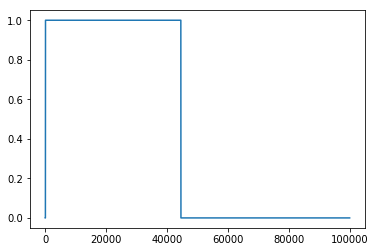

In [197]:
plt.plot(a)

In [198]:
a

array([False, False, False, ..., False, False, False])